In [1]:
import numpy as np
from PIL import Image
import albumentations

img = Image.open('C:/Users/yrh07/ML+DL Study/true_1.jpg')
imgArray = np.array(img) 

# 좌우 반전 
transform1 = albumentations.HorizontalFlip(p=1)


transformed_img = transform1(image=imgArray)['image']
transformed_pil_img = Image.fromarray(transformed_img)
transformed_pil_img.save('C:/Users/yrh07/ML+DL Study/true_1_flipped.jpg')

In [14]:
# GaussianBlur
transform = albumentations.GaussianBlur(blur_limit=11, always_apply=False, p=0.5)


transformed_img = transform(image=imgArray)['image']
transformed_pil_img = Image.fromarray(transformed_img)
transformed_pil_img.save('C:/Users/yrh07/ML+DL Study/true_1_G_blurred.jpg')

C:\Users\yrh07\anaconda3\Lib\site-packages\albumentations\augmentations\blur\transforms.py:190: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(


In [15]:
# Blur
transform = albumentations.Blur(always_apply=False, p=1.0, blur_limit=(3, 7))


transformed_img = transform(image=imgArray)['image']
transformed_pil_img = Image.fromarray(transformed_img)
transformed_pil_img.save('C:/Users/yrh07/ML+DL Study/true_1_blurred.jpg')

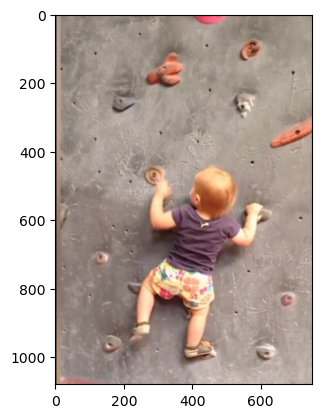

In [10]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread('C:/Users/yrh07/ML+DL Study/true_1_flipped.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [11]:
# 이미지 배열을 입력받아 5개 출력하는 함수
def show_images(images, labels):
    fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 8))
    for i in range(5):
        axs[i].imshow(images[i])
        axs[i].set_title(labels[i])

# 원본 이미지를 입력받아 4개의 augmentation 적용하여 시각화
def aug_apply(image, label, aug):
    image_list = [image]
    label_list = ['origin']

    for i in range(4):
        aug_image = aug(image=image)['image']
        image_list.append(aug_image)
        label_list.append(label)

    show_images(image_list, label_list)

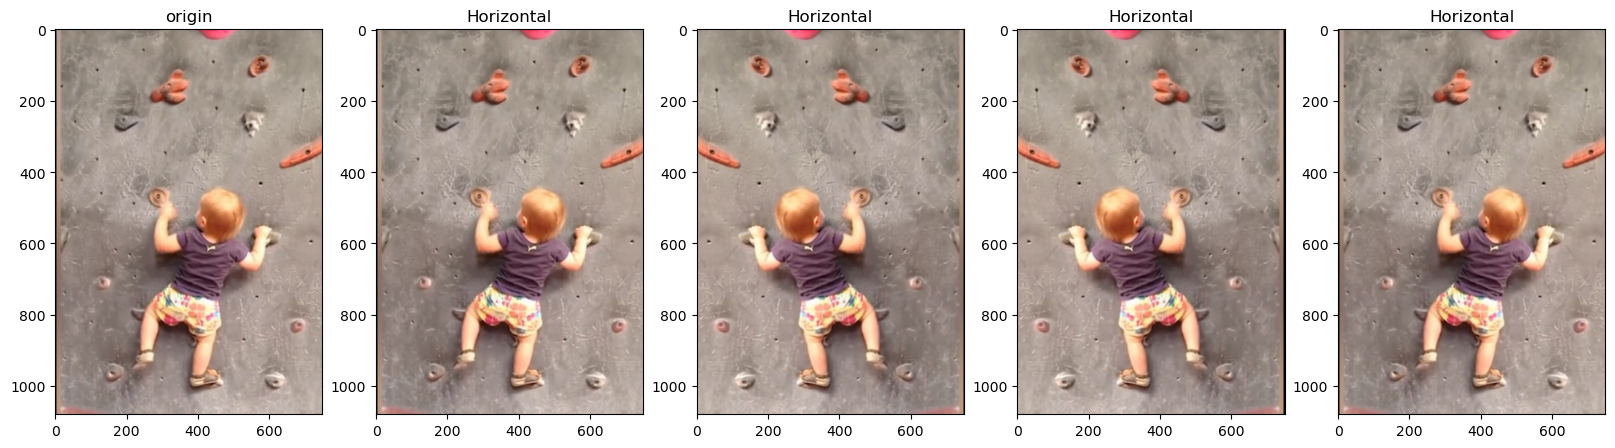

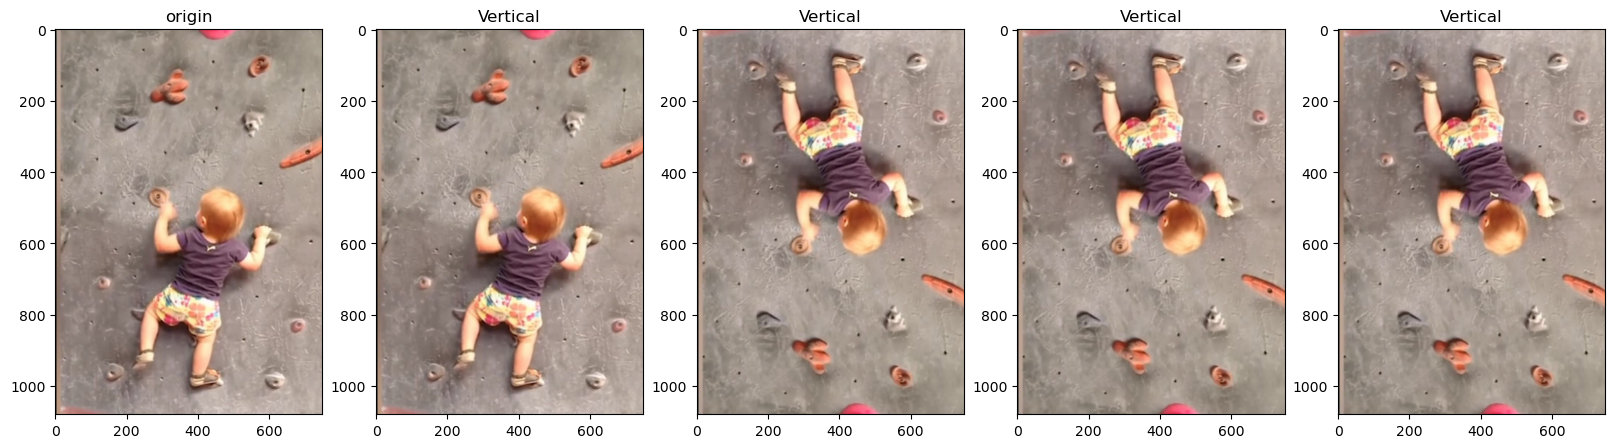

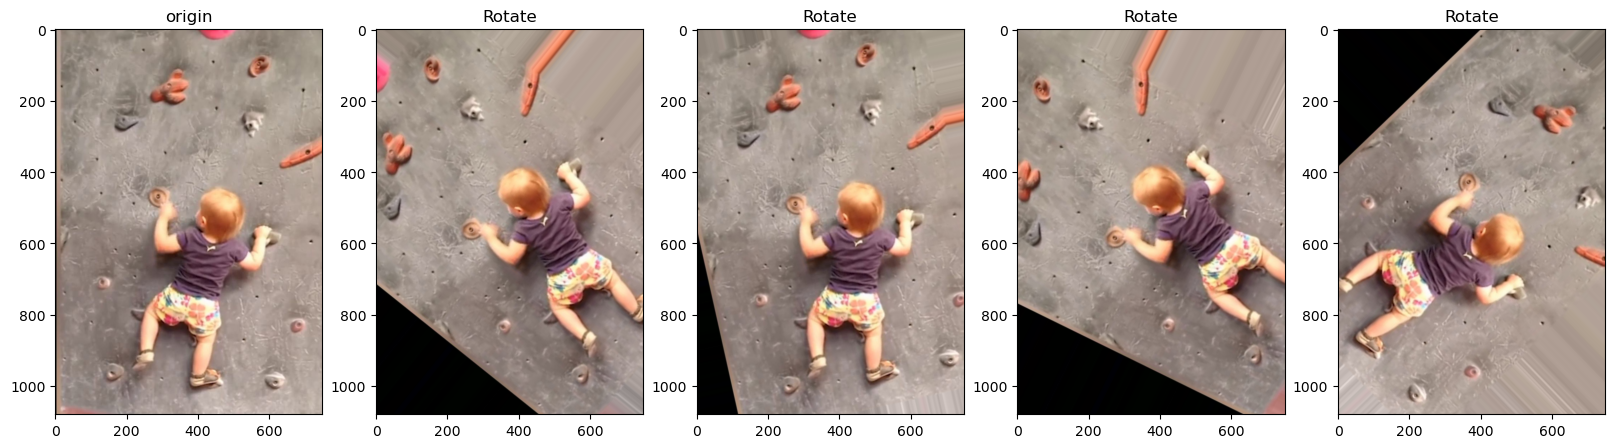

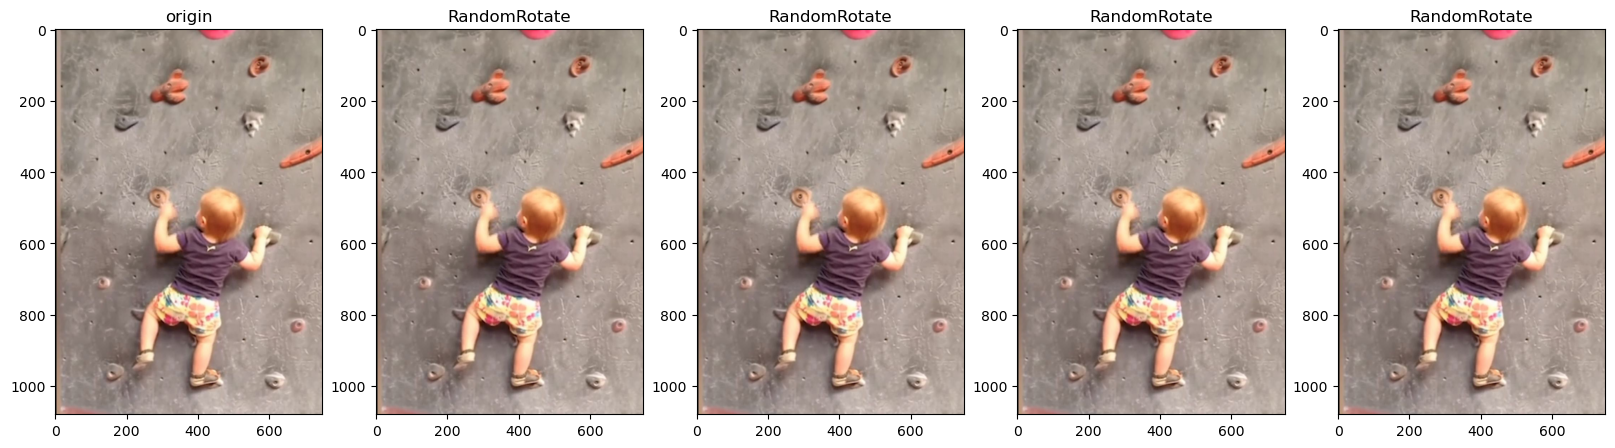

In [12]:
import albumentations as at

# 좌우 반전
aug_horizontal = at.HorizontalFlip(p=0.5)
# 상하 반전
aug_vertical = at.VerticalFlip(p=0.5)
# -90 ~ 90도 사이로 돌림, 남은 공간은 주변 환경으로 채움 (cv2.BORDER_CONSTAN, cv2.BORDER_REFLECT, cv2.BORDER_REFLECT_101, cv2.BORDER_WRAP)
aug_rotate = at.Rotate(limit=90, p=1, border_mode=cv2.BORDER_REPLICATE)
# 원본사이즈를 변경 하면서 90, 180, 270, 360도 돌림
aug_random_rotate = at.RandomRotate90(p=1)

aug_apply(image=image, label='Horizontal', aug=aug_horizontal)
aug_apply(image=image, label='Vertical', aug=aug_vertical)
aug_apply(image=image, label='Rotate', aug=aug_rotate)
aug_apply(image=image, label='RandomRotate', aug=aug_random_rotate)